In [17]:
#To run this program you need the 'SonicTheHedgehog2-Genesis' Read-only memory (rom) file 

import retro
import time

In [ ]:
retro.data.list_games()

In [1]:
!python -m retro.import .

Importing ArtOfFighting-Genesis
Importing ClayFighter-Genesis
Importing MortalKombat-Genesis
Importing MortalKombat3-Genesis
Importing MortalKombatII-Genesis
Importing SamuraiShodown-Genesis
Importing SonicAndKnuckles-Genesis
Importing SonicTheHedgehog2-Genesis
Importing TeenageMutantNinjaTurtlesTournamentFighters-Genesis
Importing ArtOfFighting-Genesis
Importing MortalKombat-Genesis
Importing MortalKombatII-Genesis
Importing SamuraiShodown-Genesis
Importing SonicAndKnuckles-Genesis
Importing SonicTheHedgehog2-Genesis
Importing TeenageMutantNinjaTurtlesTournamentFighters-Genesis
Imported 16 games


In [ ]:


env = retro.make(game='SonicTheHedgehog2-Genesis')

In [ ]:
obs = env.reset()

In [ ]:
obs = env.reset()
done = False
for game in range(1):
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        print(info)
        print(reward)

In [ ]:
env.close()




In [3]:

env.action_space.sample()

NameError: name 'env' is not defined

In [ ]:
a=env.observation_space.sample()
a.shape

In [ ]:
info

In [18]:
import gym
from gym import Env
from gym.spaces import Box, MultiBinary
import numpy as np
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt 

In [3]:
from gym import Env, ActionWrapper
from gym.spaces import Box, Discrete
class ActionDiscretizer(ActionWrapper):
    def __init__(self,env):
        super(ActionDiscretizer, self).__init__(env)
        buttons = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
        #actions = [["LEFT"], ["RIGHT"], ["LEFT", "DOWN"], ["RIGHT", "DOWN"], ["DOWN"], ["DOWN", "B"], ["B"]]
        actions = [["LEFT"], ["RIGHT"], ["B"]]
        
        self._actions = []
        
        for action in actions:
            arr = np.array([False] * 12)
            for button in action:
                arr[buttons.index(button)] = True
            self._actions.append(arr)
        self.action_space = Discrete(len(self._actions))
        
    def action(self, a):
        return self._actions[a].copy()

In [ ]:
from math import sqrt
def Explore_reward(x1,x2,rad,explore_x):
    
    cir = abs(x1-x2)
    if cir <= rad and x2 not in explore_x:
        explore_x.append(x2)
        return 0
    else:
        return 3





In [ ]:
list_x=[]


Explore_reward(1,2,1,list_x)


print(Explore_reward(288,289,1,list_x))



In [20]:
class ArtOfFighting(Env):
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(110,110, 3), dtype=np.uint8)
        self.game = retro.make(game='SonicTheHedgehog2-Genesis',)
        #self.score = 0
    
    def step(self, action):
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)
        #'x': 96, 'lives': 3, 'screen_x_end': 10656, 'game_mode': 12, 'score': 0, 'zone': 0, 'level_end_bonus': 0,
     
        
        # Shape reward
        x, lives, finishing_level, rings, kils = info["x"], info["lives"], info["level_end_bonus"], info["rings"], info["score"]
        self.ii +=1
        
        if x > self.x_farthest:
            moving_reward = abs(x-self.x_farthest)**1.5# moving forward
            self.x_farthest = x
            self.list_x = []
            self.i = 0
            
        else:
            moving_reward = 0  # moving backward
            self.i += 1
            
        self.x_last_frame = x    
        # If agent is not making any progress for n frames
        #if self.i > 2000: # 30sec = 2000
            #done = True

            
            
            #moving_reward = Explore_reward(self.x_farthest,x,300,self.list_x)# penalty
        
        lives_lost_delta = - self.lives + lives

        self.lives = lives
        rings_delta = rings - self.rings
        self.rings = rings
        kils_delta = kils - self.kils
        self.kils = kils        
        
        #if lives_lost_delta == -1:
            #done = True
#6010 6837
        bonus = 0
        if self.x_farthest > 6000 and self.bonus1:
            self.bonus1 = False
            bonus=10000
    
        if self.x_farthest > 6800 and self.bonus2:
            self.bonus2 = False
            bonus=10000

        if self.x_farthest > 7500 and self.bonus3:
            self.bonus3 = False
            bonus=10000

        reward = moving_reward*(1+(36083-self.ii)/36083) + finishing_level + bonus*(1+(36083-self.ii)/36083) 
        return obs, reward, done, info
    
    def render(self, *args, **kwargs): 
        self.game.render()
    
    def reset(self):
        
        
        # Frame delta
        obs = self.game.reset()
        obs = self.preprocess(obs)
        self.previous_frame = obs
        
        # Create initial variables
        self.list_x=[]
        self.bonus1=True
        self.bonus2=True
        self.bonus3=True
        self.x_farthest = 96
        self.lives = 3
        self.rings = 0
        self.kils = 0
        self.i = 0
        self.ii = 0
        self.x_last_frame = 96
        

        return obs
    
    def preprocess(self, observation): 
        gray = cv2.cvtColor(observation, cv2.COLOR_RGB2BGR)
        resize = cv2.resize(gray, (110,110), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize,(110,110,3))
        return state
    
    def close(self): 
        self.game.close()

In [21]:
env.action_space.sample()

AttributeError: 'NoneType' object has no attribute 'sample'

In [22]:
env.close()

In [23]:

env = ArtOfFighting()
#env = ActionDiscretizer(env)

In [ ]:
env.reset()

In [24]:
env.observation_space.shape

(110, 110, 3)

In [25]:
import time
obs = env.reset()
done = False
for game in range(1):
    while not done: 
        if done: 
            obs = env.reset()
        #env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        #time.sleep(0.001)
        
        if reward < -100:
            print(info)
            print(reward)

AttributeError: 'NoneType' object has no attribute 'sample'

In [11]:

obs, reward, done, info = env.step(env.action_space.sample())

AttributeError: 'NoneType' object has no attribute 'sample'

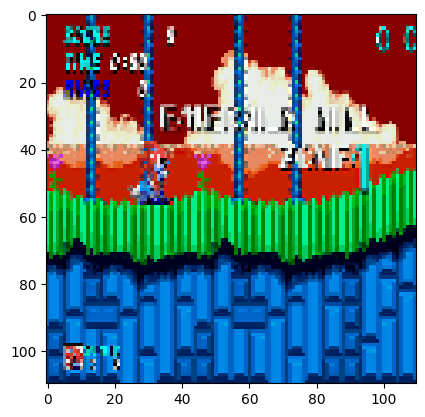

In [26]:
plt.imshow(obs)

In [ ]:
#OPTUNEA OPT
!pip install numpy==1.21

In [ ]:
import numpy
print(numpy.__version__)

In [7]:
# Import optuna for HPO
import optuna
# Import PPO for algos
from stable_baselines3 import PPO
from stable_baselines3 import SAC
# Evaluate Policy
from stable_baselines3.common.evaluation import evaluate_policy
# Import wrappers
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import os

In [ ]:

def optimize_ppo(trial):
    """ Learning hyperparamters we want to optimise"""
    return {
        'n_steps': trial.suggest_int('n_steps', 8500, 11000),
        'gamma': trial.suggest_loguniform('gamma', 0.95, 0.9999),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-7, 1e-5),
        'clip_range': trial.suggest_uniform('clip_range', 0.1, 0.2),
        'gae_lambda': trial.suggest_uniform('gae_lambda', 0.96, .99)
    }

In [ ]:
LOG_DIR = './logs/'
OPT_DIR = './opt_nodelta/'

In [ ]:

for episode in range(n): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        time.sleep(0.005)
        total_reward += reward


In [ ]:
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial)
        env = ArtOfFighting()
        env = ActionDiscretizer(env)
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')
        model = PPO("CnnPolicy", env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=2000000)
        total_reward = 0
        for episode in range(10): 
            obs = env.reset()
            done = False
            while not done: 
                action, _ = model.predict(obs)
                obs, reward, done, info = env.step(action)
                total_reward += reward
        mean_reward=total_reward/10

    
        

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)
        return mean_reward
    except Exception as e: 
        return -1000

In [ ]:
env.close()

In [ ]:

study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)

In [ ]:
study.best_params

In [ ]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
CHECKPOINT_DIR = './New_sonic_test_done_if_stuck_RBG_BIGPIC_allMOVOES_new_params/'
callback = TrainAndLoggingCallback(check_freq=500000, save_path=CHECKPOINT_DIR)

In [7]:
from stable_baselines3 import PPO
from stable_baselines3 import A2C
# Evaluate Policy
from stable_baselines3.common.evaluation import evaluate_policy
# Import wrappers
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [9]:
env.close()

In [10]:

env = ArtOfFighting()
env = ActionDiscretizer(env)
LOG_DIR = './logs/'
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')



In [11]:
model_params = {'n_steps': 9274, 'gamma': 0.952404309298884, 'learning_rate': 6.461761266921163e-07, 'clip_range': 0.13252263925687247, 'gae_lambda': 0.9657815788816071}
#{'gamma': 0.9956193908499814, 'n_steps': 10240, 'learning_rate': 1e-06, 'clip_range': 0.11181817995205309, 'gae_lambda': 0.9837323249216188}


In [13]:
model = PPO("CnnPolicy", env, tensorboard_log=LOG_DIR, verbose=0, **model_params)

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\stable_baselines3\ppo\ppo.py:145: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 9274`, after every 144 untruncated mini-batches, there will be a truncated mini-batch of size 58
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=9274 and n_envs=1)
  warnings.warn(


In [ ]:
model = A2C("MlpPolicy", env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=1e-6)

In [ ]:
timesteps = 20000000
model.learn(total_timesteps=timesteps, callback=callback)
#model.learn(total_timesteps=timesteps, callback=callback)

In [ ]:
model.learn(total_timesteps=timesteps)

In [ ]:
model.save("PPO_MlpPolicy"+str(timesteps)+" 3500 reward")

In [27]:
model.save("tester_3")

In [54]:

model = PPO.load('train_Sonic/best_model_500000.zip')

In [53]:
model = PPO.load("tester_3")

In [52]:
model = PPO.load("PPO_MlpPolicy"+str(timesteps)+" 3500 reward")

NameError: name 'timesteps' is not defined

In [49]:
env.close()

In [50]:

env = ArtOfFighting()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=1, render=True)

In [ ]:
mean_reward

In [ ]:
tensorboard --logdir=./
tensorboard --logdir=Documents\aa_fight\logs
cd Documents\aa_fight\logs

In [ ]:
model._last_obs = None
model.learn(total_timesteps=500000, log_interval=4, reset_num_timesteps=False)

In [55]:
for episode in range(1): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        
        obs, reward, done, info = env.step(action)
        env.render()
        time.sleep(0.0001)
        total_reward += reward

    print(total_reward)
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

ValueError: Error: Unexpected observation shape (1, 84, 84, 12) for Box environment, please use (4, 84, 84) or (n_env, 4, 84, 84) for the observation shape.

model.save("hold")

In [ ]:
del model
env.close()



In [ ]:
model = PPO("MlpPolicy", env, tensorboard_log=LOG_DIR, verbose=1, **model_params)


In [ ]:
for i in range(10):
    model=PPO.load('opt_nodelta/trial_5_best_model.zip')
    env = ArtOfFighting()
    env = ActionDiscretizer(env)
    LOG_DIR = './logs/'
    env = Monitor(env, LOG_DIR)
    env = DummyVecEnv([lambda: env])
    env = VecFrameStack(env, 4, channels_order='last')

    model.set_env(env)

    timesteps = 1000000
    model.learn(total_timesteps=timesteps)
    model.save(f"tester_{i}")
    del model
    env.close()



In [ ]:
timesteps = 500000
model.learn(total_timesteps=timesteps)

In [ ]:
model.save("hold")